<a href="https://colab.research.google.com/github/jaimesilvads/databriks/blob/main/SparckComDatabriks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Usando Pyspark a/ processar dados de um data lake community DataBriks

### Foi realizado o Upload dos dados para landing zone

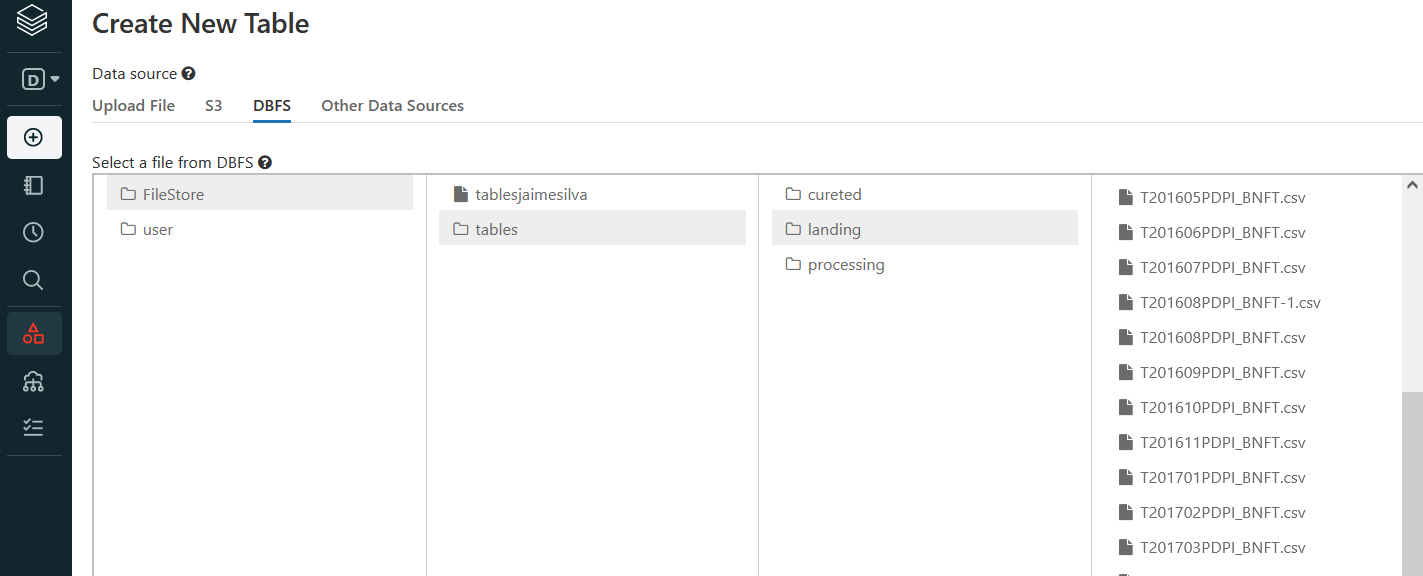

### Carregando os dados do nosso Data Lake

In [ ]:
df = spark.read.format("csv")\
.option("header", "True")\
.option("inferSchema","True")\
.load("/FileStore/tables/landing/T2*.csv")

### imprime os dados lidos da landing zone

In [ ]:
display(df.head(10))

practice,bnf_code,bnf_name,items,nic,act_cost,quantity
5668,8092,592,2,44.1,40.84,189
1596,17512,16983,2,1.64,1.64,35
1596,25587,16124,1,1.26,1.28,42
1596,12551,1282,2,0.86,1.02,42
1596,18938,10575,1,1.85,1.82,56
1596,8777,21507,1,3.31,3.18,56
1596,9369,12008,1,63.15,58.56,56
1596,27926,17643,2,158.66,147.07,56
1596,26148,10230,1,0.35,0.44,14
1596,9148,3381,1,0.26,0.35,7


### imprime o schema do dataframe

In [ ]:
print (df.printSchema())

root
 |-- practice: integer (nullable = true)
 |-- bnf_code: integer (nullable = true)
 |-- bnf_name: integer (nullable = true)
 |-- items: integer (nullable = true)
 |-- nic: double (nullable = true)
 |-- act_cost: double (nullable = true)
 |-- quantity: integer (nullable = true)

None


### Limpando os dados inválidos

In [ ]:
df.na.fill(value=0,subset=["quantity"]).show()

+--------+--------+--------+-----+------+--------+--------+
|practice|bnf_code|bnf_name|items|   nic|act_cost|quantity|
+--------+--------+--------+-----+------+--------+--------+
|    5668|    8092|     592|    2|  44.1|   40.84|     189|
|    1596|   17512|   16983|    2|  1.64|    1.64|      35|
|    1596|   25587|   16124|    1|  1.26|    1.28|      42|
|    1596|   12551|    1282|    2|  0.86|    1.02|      42|
|    1596|   18938|   10575|    1|  1.85|    1.82|      56|
|    1596|    8777|   21507|    1|  3.31|    3.18|      56|
|    1596|    9369|   12008|    1| 63.15|   58.56|      56|
|    1596|   27926|   17643|    2|158.66|  147.07|      56|
|    1596|   26148|   10230|    1|  0.35|    0.44|      14|
|    1596|    9148|    3381|    1|  0.26|    0.35|       7|
|    1596|   19500|   18008|    1|  0.85|     0.9|      14|
|    1596|    5312|    2870|    1|  0.56|    0.63|      14|
|    1596|    5008|   15013|    1|  0.19|    0.29|       7|
|    1596|    2885|    1851|    2|  1.99

### Convertendo para formato parquet

In [ ]:
df.write.format("parquet")\
        .mode("overwrite")\
        .save("/FileStore/tables/processing/df-formatado.parquet")

### Lendo o arquivos parquet para agregação de dados

In [ ]:
df_parquet = spark.read.format("parquet")\
 .load("/FileStore/tables/processing/df-formatado.parquet")

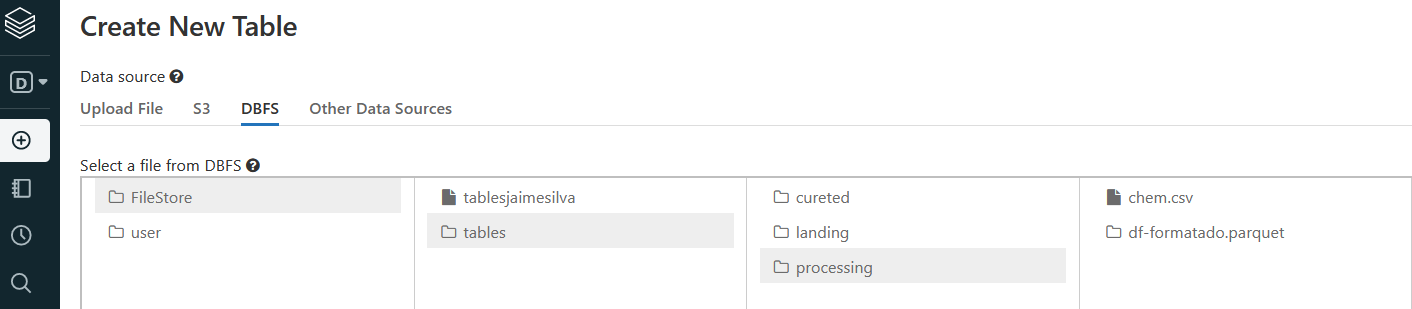

In [ ]:
df_parquet.show()

+--------+--------+--------+-----+------+--------+--------+
|practice|bnf_code|bnf_name|items|   nic|act_cost|quantity|
+--------+--------+--------+-----+------+--------+--------+
|    3626|   12090|   20521|    3|   8.4|    7.82|     168|
|    3626|   23511|   11576|    1| 32.18|   29.81|      28|
|    3626|   14802|   14672|  162|141.13|  133.93|    4760|
|    3626|   14590|   10011|   17| 15.01|   14.12|     532|
|    3626|   24483|   13726|   69| 57.57|   54.67|    2121|
|    3626|    7768|   22070|  155|113.03|  109.41|    4144|
|    3626|    1877|   13598|  102|  68.5|    67.4|    2370|
|    3626|   18110|    3990|  189|156.66|  150.44|    5222|
|    3626|   14058|    2144|   23| 23.52|   22.48|     588|
|    3626|    4558|    5695|   32|116.64|  109.21|     756|
|    3626|    2851|     471|   97| 73.44|   71.92|    2387|
|    3626|   20025|   21500|    2|   9.4|    8.74|     112|
|    3626|   19371|   19847|    1|   5.9|    5.48|      28|
|    3626|   21630|      92|    1|  11.8

### cria uma view para trabalhar com sql

In [ ]:
df_parquet.createOrReplaceTempView("Dados_Sql")

### processa os dados conforme regra de negócio

In [ ]:
df_sql = spark.sql("SELECT BNF_CODE as Bnf_code \
                       ,SUM(ACT_COST) as Soma_cost \
                       ,SUM(QUANTITY) as Soma_Quantidade \
                       ,SUM(ITEMS) as Soma_items \
                       ,AVG(ACT_COST) as Media_cost \
                      FROM Dados_Sql \
                      GROUP BY bnf_code")

In [ ]:
df_sql.show()

+--------+-------------------+---------------+----------+------------------+
|Bnf_code|          Soma_cost|Soma_Quantidade|Soma_items|        Media_cost|
+--------+-------------------+---------------+----------+------------------+
|   16250|3.769104584999993E7|       994129.0|  845989.0| 508.3903780787171|
|    2088|  9105466.170000017|    2.4188764E8| 2677090.0| 106.1824795633974|
|   13865| 12989.770000000006|        63478.0|    2031.0| 9.180049469964668|
|   18306| 52142.059999999816|      2517150.0|   17030.0| 4.185763827566815|
|    5325|  310848.3899999983|       783359.0|   50699.0|12.204491166077673|
|   24114| 60152.000000000015|        21405.0|     373.0|178.49258160237392|
|    6240| 222630.83000000007|        86646.0|    4412.0| 82.73163507989598|
|   20428|  305973.7399999996|      1648494.0|   24401.0|20.386017722699687|
|   19132| 1156145.2500000005|    7.5012454E7|    9336.0|203.15326831839755|
|     691|  7792272.970000002|      1276771.0| 1276581.0|1427.9408044713216|

In [ ]:
df_sql.write.format("parquet")\
            .mode("overwrite")\
            .save("/FileStore/tables/cureted/df-Dados-Agregados.parquet")

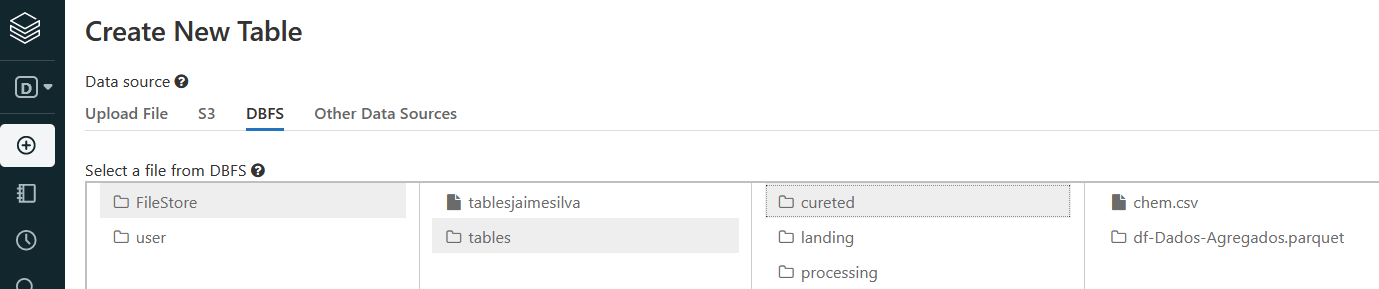